# Exploration of spatially resolved population dynamics

also see x12 output folders for post-processed movies


## 01 with trade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import trange

<Axes: xlabel='time'>

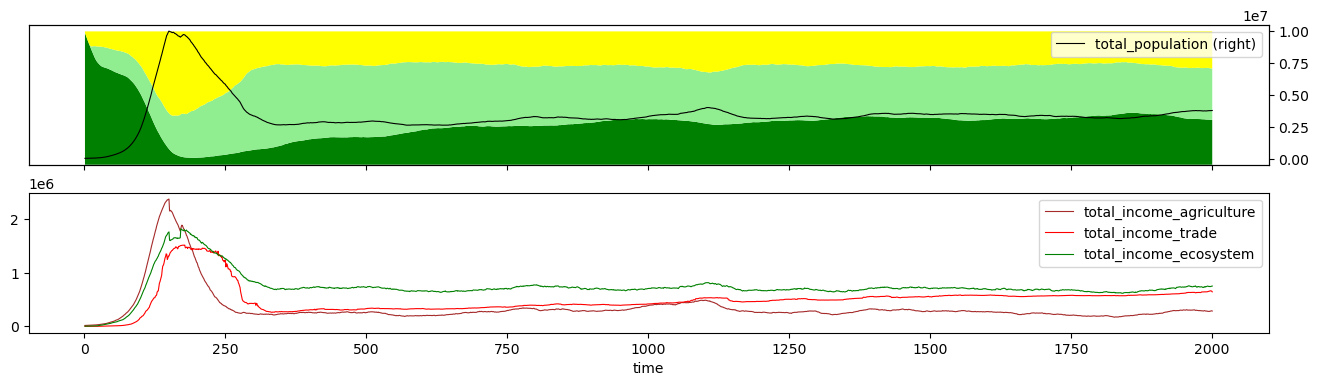

In [3]:
data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/4000-7000-9500_s0.pkl')['aggregates']

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True)

# forest state
axes[0].stackplot(
    data['time'],
    data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'],
    colors=['green', 'lightgreen', 'yellow']
)

# population
data.plot('time', y='total_population', lw=.8, color='k', ax=axes[0], secondary_y=True)

# income
data.plot('time', y='total_income_agriculture', lw=.8, color='brown', ax=axes[1])
data.plot('time', y='total_income_trade', lw=.8, color='red', ax=axes[1])
data.plot('time', y='total_income_ecosystem', lw=.8, color='green', ax=axes[1])

In [31]:
steps = 2000

data = pd.read_pickle(f'../output/x12_spatial_dynamics/raw_data/4000-7000-9500_s0/settlement_data_001.pkl')
pop = data.transpose().loc[['population']]
pop.index = ['1']
pop.columns = data.position

for step in trange(2, steps+1):
    data = pd.read_pickle(f'../output/x12_spatial_dynamics/raw_data/4000-7000-9500_s0/settlement_data_{step:03d}.pkl')

    pop_step = data.transpose().loc[['population']]
    pop_step.index = [str(step)]
    pop_step.columns = data.position

    pop = pd.concat([pop, pop_step], axis=0)

pop.to_pickle('../output/x12_spatial_dynamics/results/4000-7000-9500_s0/settlements_pop.pkl')

  0%|          | 0/1999 [00:00<?, ?it/s]

In [33]:
pop_1 = pd.read_pickle('../output/x12_spatial_dynamics/results/4000-7000-9500_s0/settlements_pop.pkl')

pop_1.shape

(2000, 17709)

<Axes: >

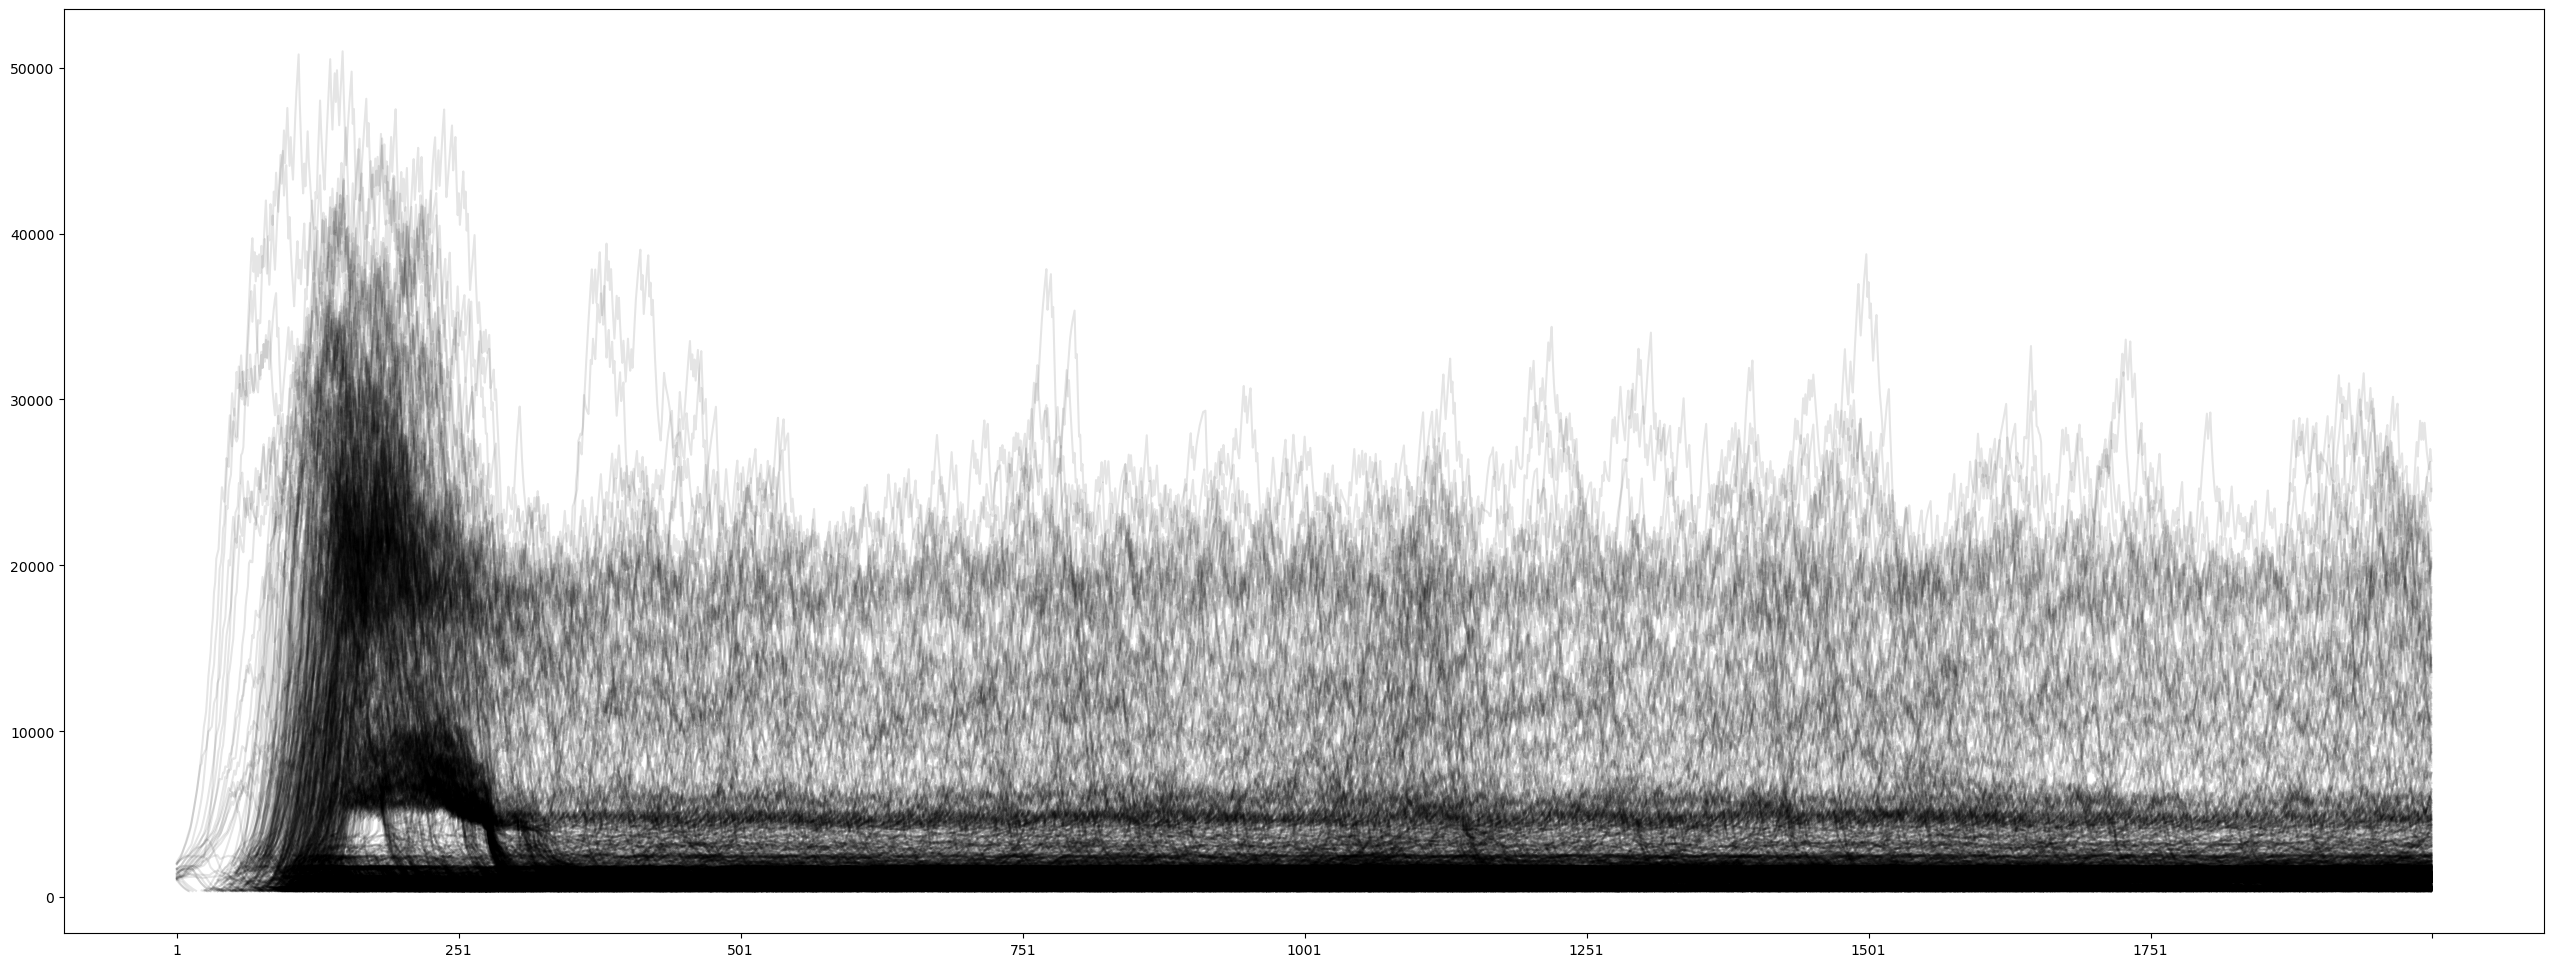

In [33]:
pop_1.plot(c='k', alpha=.1, legend=False, figsize=(32,12))

In [119]:
# draw random sample
sample_1 = np.random.randint(0, pop_1.shape[1], size=200)

Text(0.5, 0, 'timesteps')

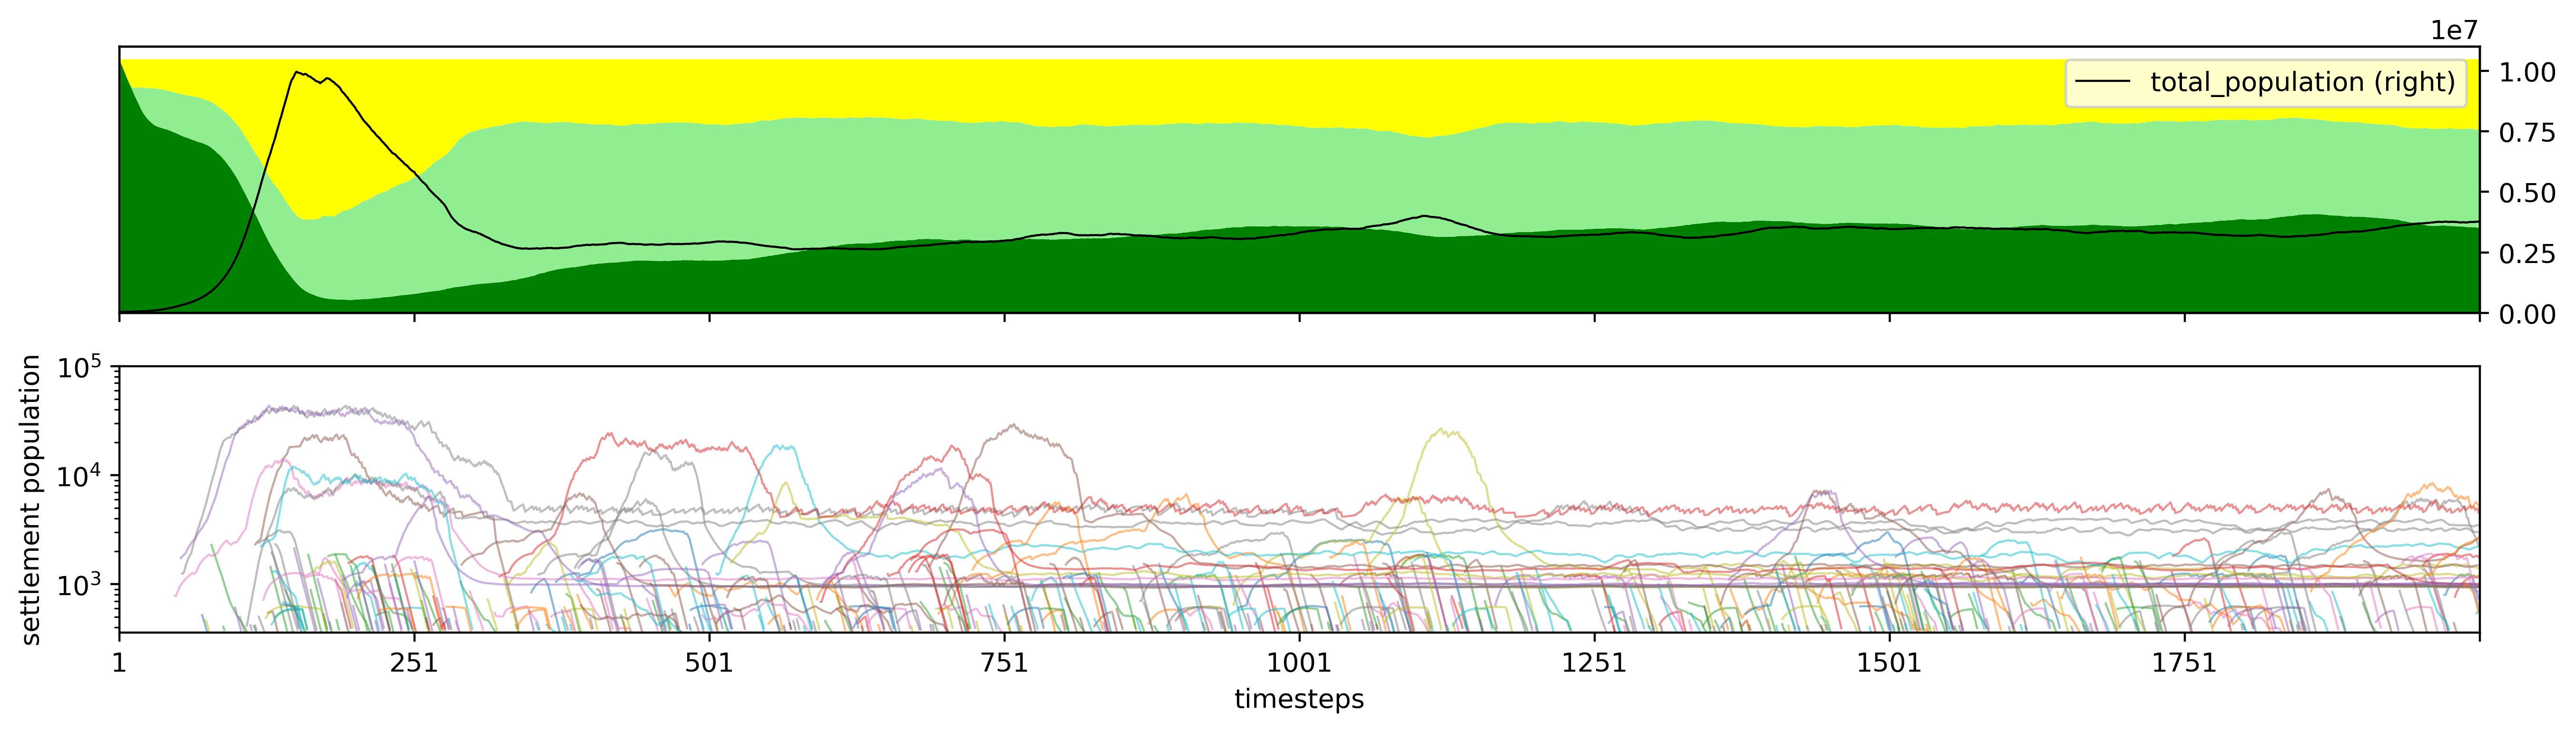

In [48]:
data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/4000-7000-9500_s0.pkl')['aggregates']

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True, dpi=400)

# forest state
axes[0].stackplot(
    data['time'],
    data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'],
    colors=['green', 'lightgreen', 'yellow']
)

# population
data.plot('time', y='total_population', lw=.8, color='k', ax=axes[0], secondary_y=True, ylim=(0,1.1e7))

# draw random sample
pop_1.iloc[:,sample_1].plot(ax=axes[1], lw=.8, alpha=.5, legend=False)
axes[1].set_yscale('log')
axes[1].set_ylim(360, 1e5)
axes[1].set_xlim(0, 2000)
axes[1].set_ylabel('settlement population')
axes[1].set_xlabel('timesteps')

In [34]:
# draw random sample
sample_1 = np.random.randint(0, pop_1.shape[1], size=200)

In [41]:
# calculate necessary population to get first neighboring cells under influence
h = 2.1
w = 2.115740740740741
r = np.array([w, np.sqrt(h**2 + w**2), 2*w, np.sqrt((2*h)**2 + w**2), 2*np.sqrt(h**2 + w**2)])

#r = pop**0.8 / 60
p_min = (r * 60)**(1/0.8)

print(p_min.round())

[ 426.  654. 1013. 1156. 1556.]


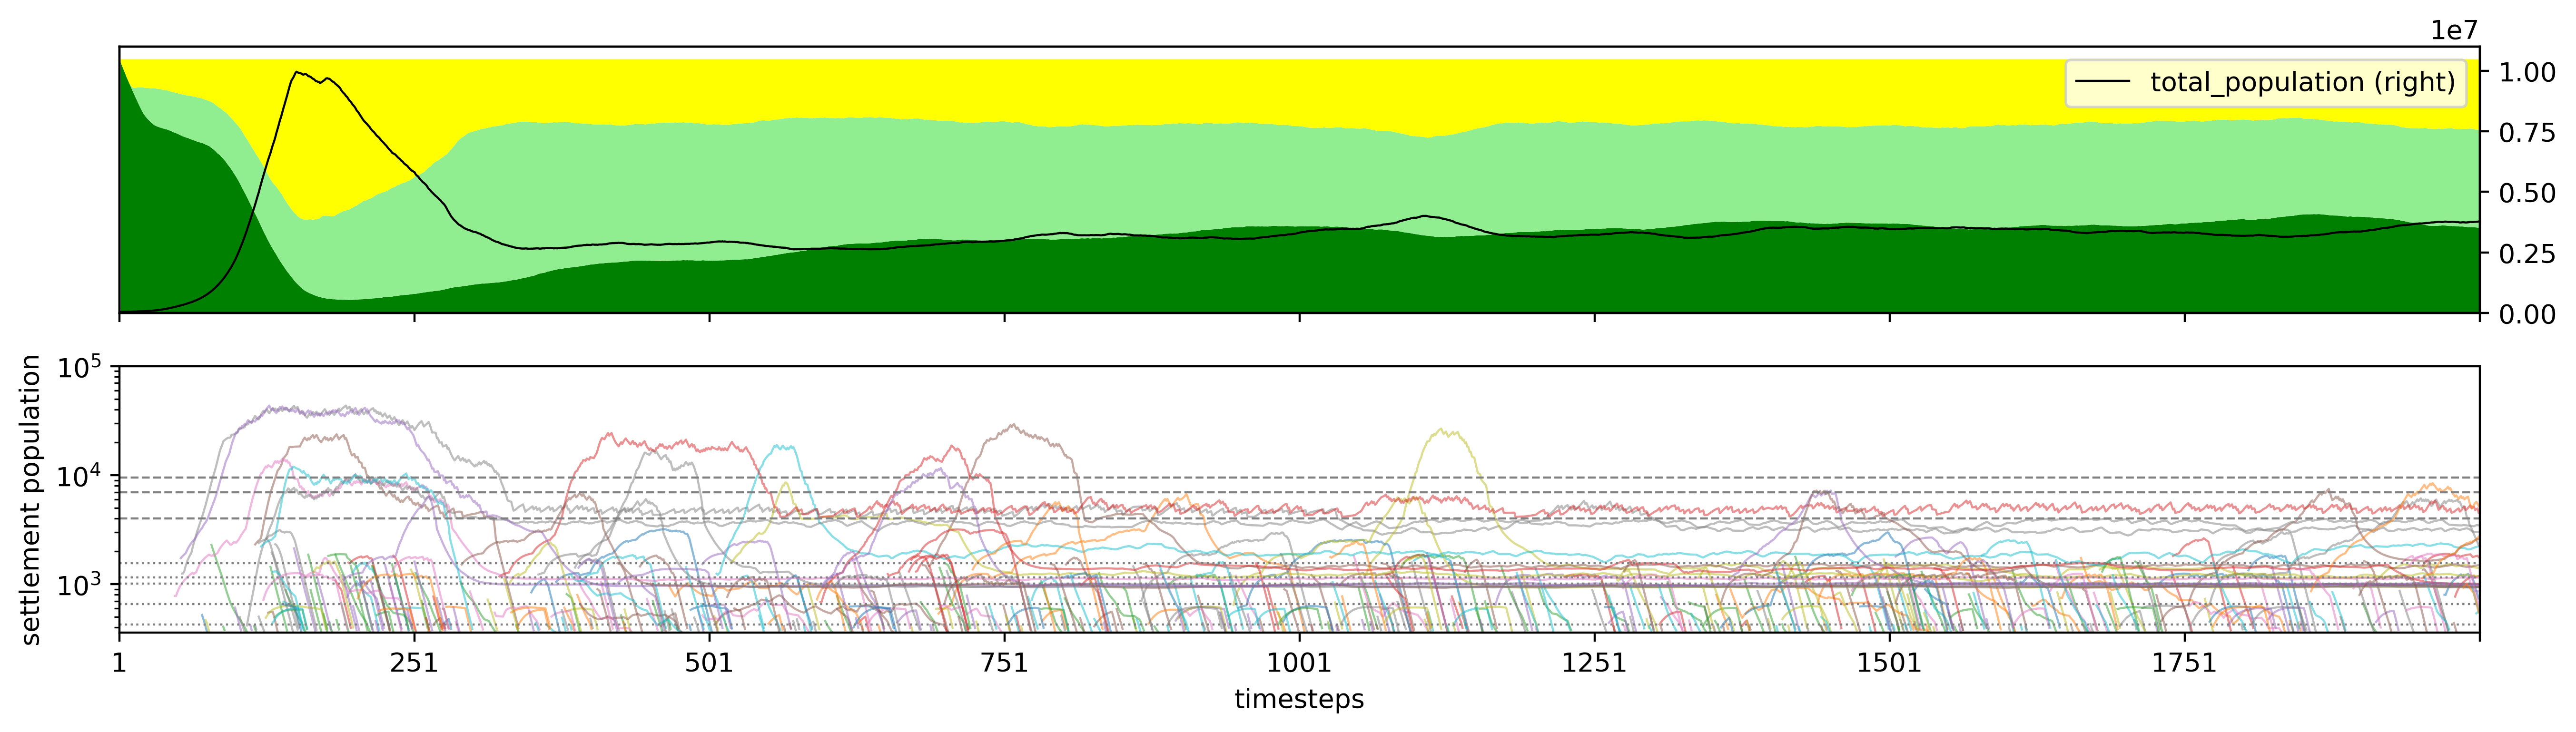

In [46]:
data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/4000-7000-9500_s0.pkl')['aggregates']

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True, dpi=400)

# forest state
axes[0].stackplot(
    data['time'],
    data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'],
    colors=['green', 'lightgreen', 'yellow']
)

# population
data.plot('time', y='total_population', lw=.8, color='k', ax=axes[0], secondary_y=True, ylim=(0,1.1e7))

# draw random sample
pop_1.iloc[:,sample_1].plot(ax=axes[1], lw=.8, alpha=.5, legend=False)
axes[1].set_yscale('log')
axes[1].set_ylim(360, 1e5)
axes[1].set_xlim(0, 2000)
axes[1].set_ylabel('settlement population')
axes[1].set_xlabel('timesteps')

axes[1].axhline(y=9500, c='grey', lw=.8, ls='--', label='trade rank 3')
axes[1].axhline(y=7000, c='grey', lw=.8, ls='--', label='trade rank 2')
axes[1].axhline(y=4000, c='grey', lw=.8, ls='--', label='trade rank 1')

axes[1].axhline(y=p_min[0], c='grey', lw=.8, ls=':', label='first 4 neighs')
axes[1].axhline(y=p_min[1], c='grey', lw=.8, ls=':', label='second 4 neighs')
axes[1].axhline(y=p_min[2], c='grey', lw=.8, ls=':', label='next 4 neighs')
axes[1].axhline(y=p_min[3], c='grey', lw=.8, ls=':', label='next 8 neighs')
axes[1].axhline(y=p_min[4], c='grey', lw=.8, ls=':', label='next 4 neighs')

there seems to be an attractor at pop ~ 1000, why?

- A migrant settlement spins of when migrant-population share reaches 400 people. If out-migration rate is at max (0.15), this would happen at a total settlement population of 2666 people (or more if out-migration rate is smaller). This doesn't explain it.
- Influence radius reaches [4, 4, 4, 8, 4] next nearest neighbors at [426,  654, 1013, 1156, 1556] inhabitants. Thus, at just over 1000 inhabitants 12 new cells can be gained. If these cells cannot produce enough AG or ES output (e.g. due to cleared forest or degraded soil), the settlement population will always drop below that threshold again.

## 02 no trade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import trange

<Axes: xlabel='time'>

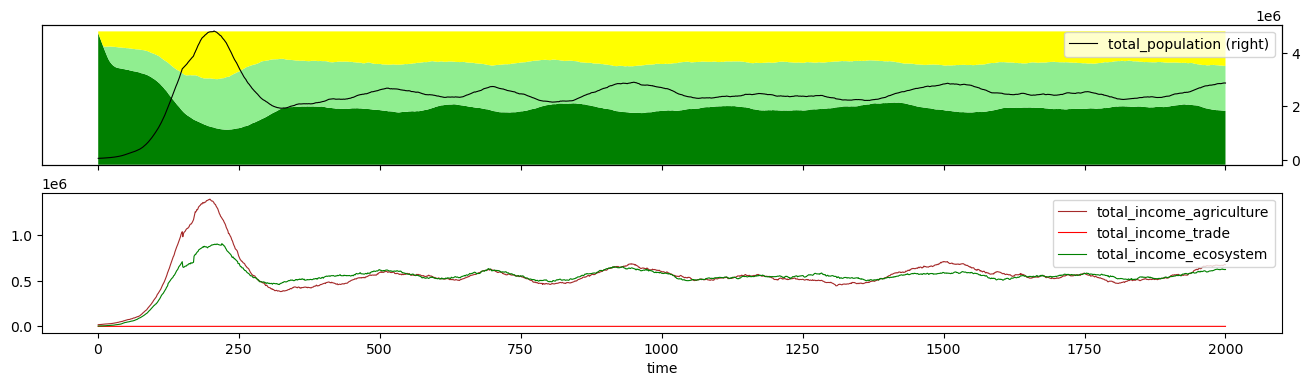

In [63]:
data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/1000000-1000000-1000000_s0.pkl')['aggregates']

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True)

# forest state
axes[0].stackplot(
    data['time'],
    data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'],
    colors=['green', 'lightgreen', 'yellow']
)

# population
data.plot('time', y='total_population', lw=.8, color='k', ax=axes[0], secondary_y=True)

# income
data.plot('time', y='total_income_agriculture', lw=.8, color='brown', ax=axes[1])
data.plot('time', y='total_income_trade', lw=.8, color='red', ax=axes[1])
data.plot('time', y='total_income_ecosystem', lw=.8, color='green', ax=axes[1])

In [ ]:
steps = 2000

data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/1000000-1000000-1000000_s0/settlement_data_001.pkl')
pop = data.transpose().loc[['population']]
pop.index = ['1']
pop.columns = data.position

for step in trange(2, steps+1):
    data = pd.read_pickle(f'../output/x12_spatial_dynamics/raw_data/1000000-1000000-1000000_s0/settlement_data_{step:03d}.pkl')

    pop_step = data.transpose().loc[['population']]
    pop_step.index = [str(step)]
    pop_step.columns = data.position

    pop = pd.concat([pop, pop_step], axis=0)

pop.to_pickle('../output/x12_spatial_dynamics/results/1000000-1000000-1000000_s0/settlements_pop.pkl')

In [3]:
pop_2 = pd.read_pickle('../output/x12_spatial_dynamics/results/1000000-1000000-1000000_s0/settlements_pop.pkl')

pop_2.shape

(2000, 19132)

<Axes: >

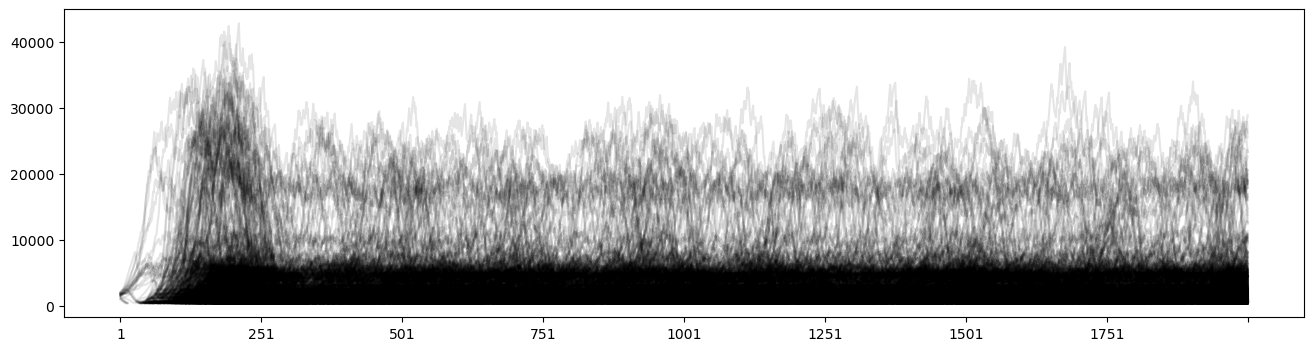

In [139]:
pop_2.plot(c='k', alpha=.1, legend=False, figsize=(16,4))

In [49]:
# draw random sample
sample_2 = np.random.randint(0, pop_2.shape[1], size=200)

Text(0.5, 0, 'timesteps')

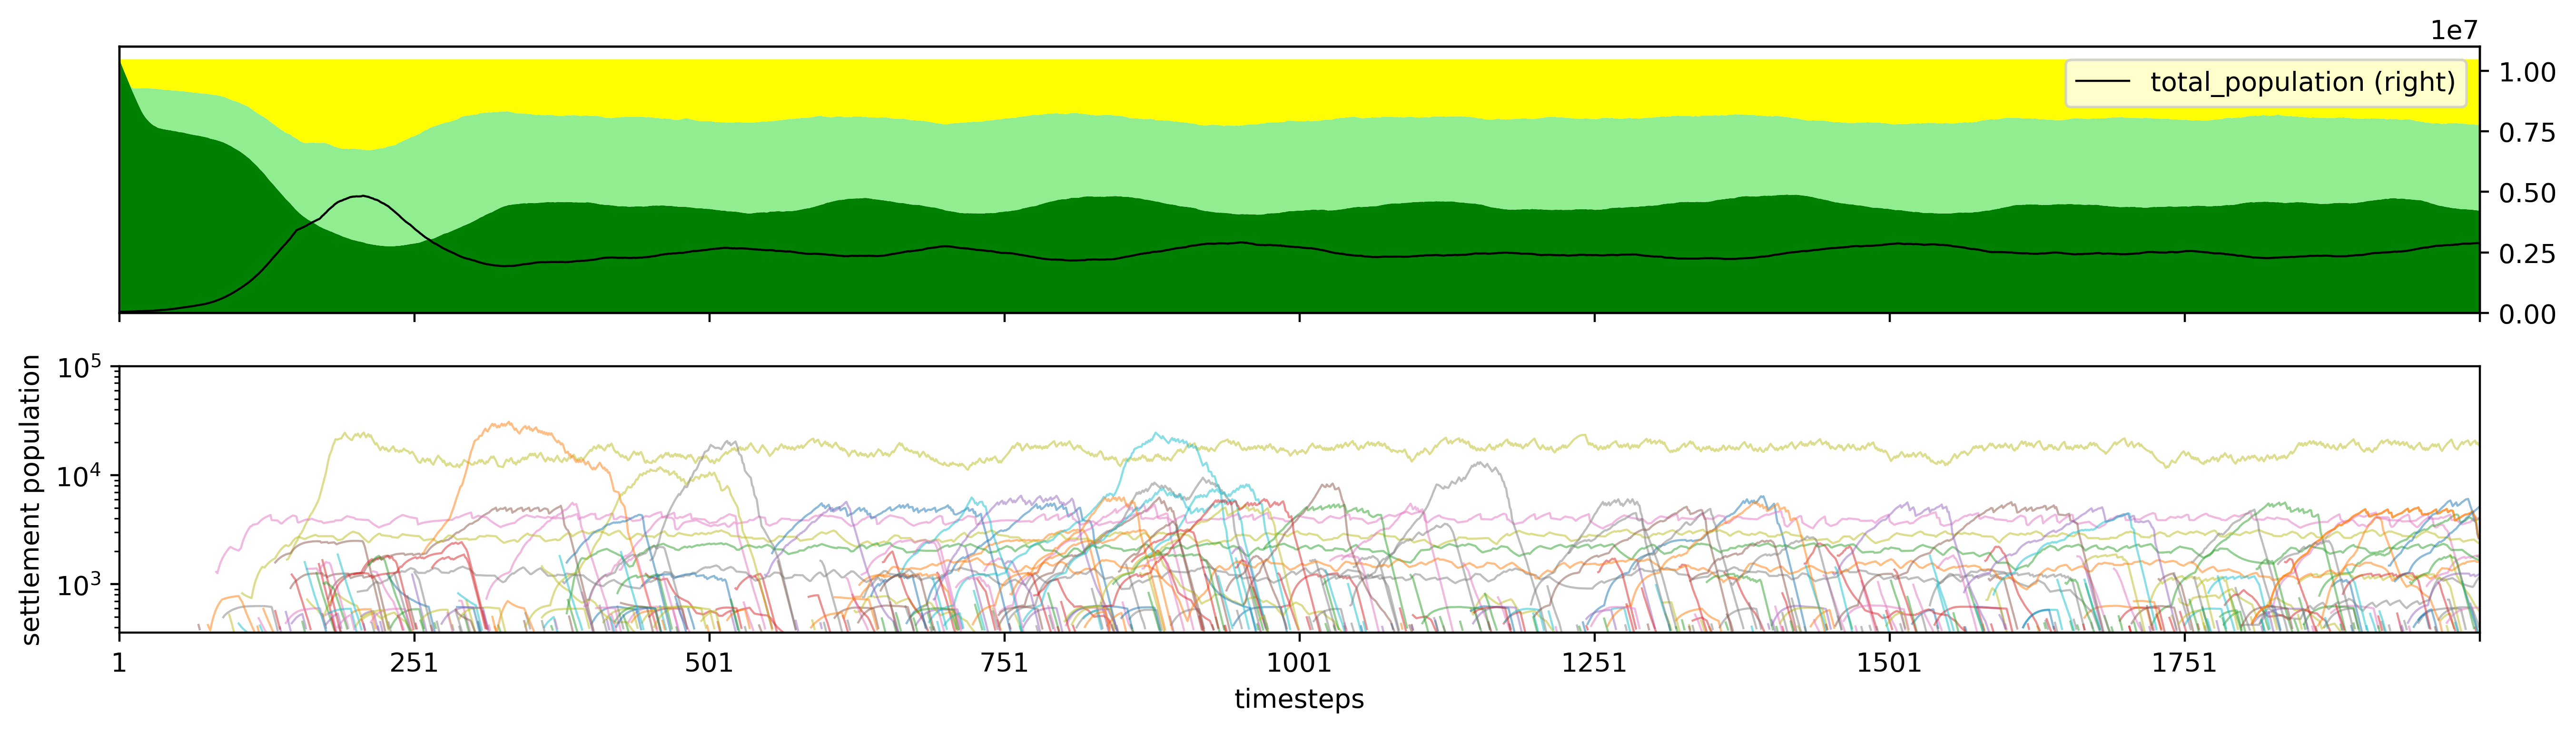

In [50]:
data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/1000000-1000000-1000000_s0.pkl')['aggregates']

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True, dpi=400)

# forest state
axes[0].stackplot(
    data['time'],
    data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'],
    colors=['green', 'lightgreen', 'yellow']
)

# population
data.plot('time', y='total_population', lw=.8, color='k', ax=axes[0], secondary_y=True, ylim=(0,1.1e7))

# draw random sample
pop_2.iloc[:,sample_2].plot(ax=axes[1], lw=.8, alpha=.5, legend=False)
axes[1].set_yscale('log')
axes[1].set_ylim(360, 1e5)
axes[1].set_xlim(0, 2000)
axes[1].set_ylabel('settlement population')
axes[1].set_xlabel('timesteps')

In [31]:
# calculate necessary population to get first neighboring cells under influence
h = 2.1
w = 2.115740740740741
r = np.array([w, np.sqrt(h**2 + w**2), 2*w, np.sqrt((2*h**2 + w**2)), 2*np.sqrt(h**2 + w**2)])

#r = pop**0.8 / 60
p_min = (r * 60)**(1/0.8)

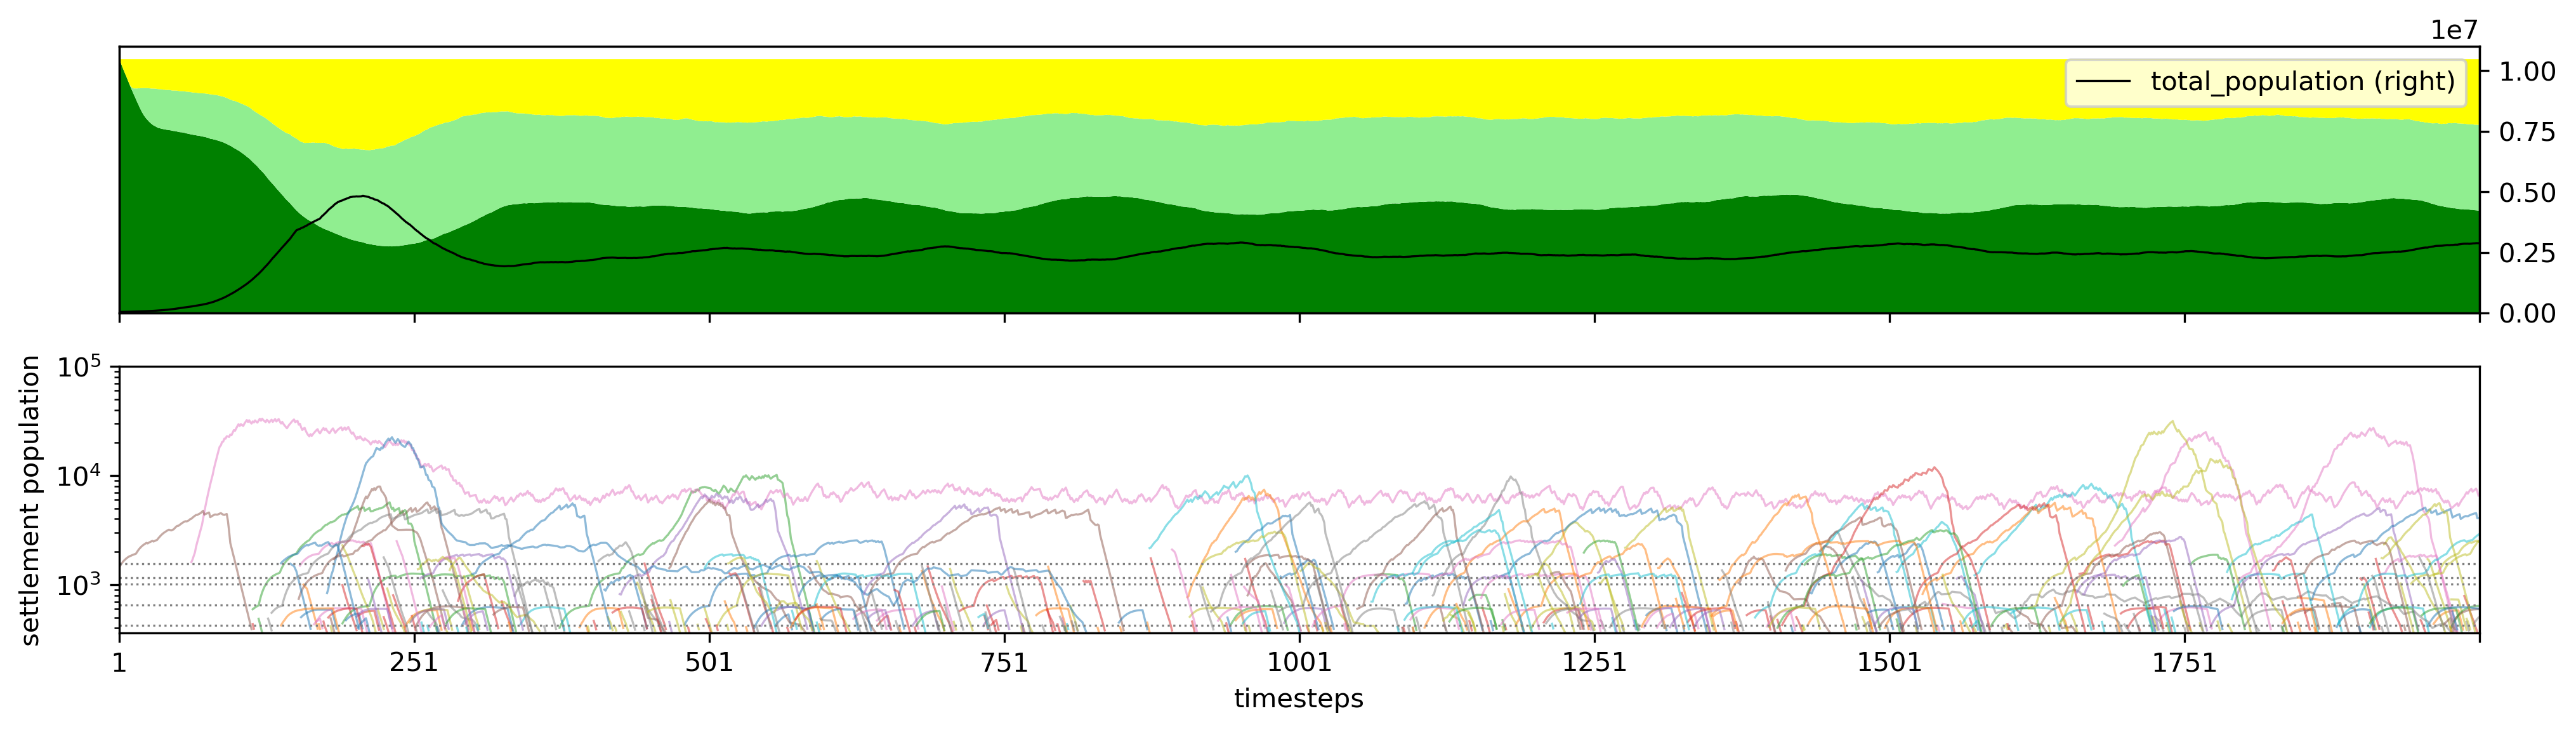

In [52]:
data = pd.read_pickle('../output/x12_spatial_dynamics/raw_data/1000000-1000000-1000000_s0.pkl')['aggregates']

# plot aggregate trajectory
fig, axes = plt.subplots(nrows=2, figsize=(16, 4), sharex=True, dpi=300)

# forest state
axes[0].stackplot(
    data['time'],
    data['forest_state_3_cells'], data['forest_state_2_cells'], data['forest_state_1_cells'],
    colors=['green', 'lightgreen', 'yellow']
)

# population
data.plot('time', y='total_population', lw=.8, color='k', ax=axes[0], secondary_y=True, ylim=(0,1.1e7))

# draw random sample
pop_2.iloc[:,sample_2].plot(ax=axes[1], lw=.8, alpha=.5, legend=False)
axes[1].set_yscale('log')
axes[1].set_ylim(360, 1e5)
axes[1].set_xlim(0, 2000)
axes[1].set_ylabel('settlement population')
axes[1].set_xlabel('timesteps')

axes[1].axhline(y=p_min[0], c='grey', lw=.8, ls=':', label='first 4 neighs')
axes[1].axhline(y=p_min[1], c='grey', lw=.8, ls=':', label='second 4 neighs')
axes[1].axhline(y=p_min[2], c='grey', lw=.8, ls=':', label='next 4 neighs')
axes[1].axhline(y=p_min[3], c='grey', lw=.8, ls=':', label='next 8 neighs')
axes[1].axhline(y=p_min[4], c='grey', lw=.8, ls=':', label='next 4 neighs')